In [22]:
import numpy as np


q = 9  
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])  # Weights for velocity vectors
ξ = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])  # Velocity vectors

# Define the flow algorithm function
def flow_algorithm(ρ, N, ω, ω_tilde, nbFrames):
    velocity_field = np.zeros((nbFrames, ρ.shape[0], ρ.shape[1], 2))  # Initialize velocity field

    for t in range(nbFrames):
        for x in range(ρ.shape[0]):
            for y in range(ρ.shape[1]):
                f_s = np.zeros(q)  # Initialize distribution function

                for i in range(q):
                    f_s[i] = w[i] * ρ[x, y,t]  # Initialize probabilities

                for n in range(N):
                    for i in range(q):
                        ρ_xy_t = ρ[x, y,t]
                        v_n_xy_t = velocity_field[t, x, y]

                        f_eq = w[i] * ρ_xy_t  # Calculate equilibrium distribution
                        f_s[i] -= ω * (f_s[i] - f_eq - ξ[i].dot(v_n_xy_t))  # Collision step

                velocity_field[t, x, y] = calculate_velocity(f_s, ρ[x, y,t])  # Calculate velocity field

    return velocity_field

def calculate_velocity(f_s, ρ_xy):
    velocity = np.zeros(2)
    for i in range(q):
        velocity += ξ[i] * f_s[i]
    return velocity / ρ_xy

# Example usage
ρ = video_image  # Example spatio-temporal image
N = 5  # Number of correction cycles
ω = 0.1  # Relaxation frequency
ω_tilde = 0.1  # Correction rate
nbFrames = 2  # Number of frames in the video

velocity_field = flow_algorithm(ρ, N, ω, ω_tilde, nbFrames)

print(velocity_field.shape)


C:\Temp\hmajid2021\ipykernel_12096\3976905903.py:36: RuntimeWarning: invalid value encountered in divide
  return velocity / ρ_xy


(2, 48, 48, 2)


In [7]:
a = [1,2,3,4,5,6,7]
print(max(a))

7


In [14]:
import numpy as np

q = 9  
omega = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])  # Weights for velocity vectors
epsilon = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])  # Velocity vectors

# Define the flow algorithm function
def flow_algorithm(rho, N, omega_fr, omega_tilde, nbFrames):
    velocity_field = np.zeros((nbFrames, rho.shape[0], rho.shape[1], 2))  # Initialize velocity field
    f_s = np.zeros((q, rho.shape[0], rho.shape[1], nbFrames))  # Initialize distribution function
    rho_n = np.zeros((rho.shape[0], rho.shape[1],nbFrames ))
    for t in range(nbFrames-1):
        for x in range(1,rho.shape[0]-1):
            for y in range(rho.shape[1]):
                for i in range(q):
                    f_s[i,x,y,t] = omega[i] * rho[x,y,t]  # Initialize probabilities

        for n in range(N):
            for x in range(rho.shape[0]):
                for y in range(rho.shape[1]): 
                    for i in range(q):
                        rho_xy_t = rho[x, y, t]
                        v_n_xy_t = velocity_field[t, x, y]

                        f_eq = omega[i] * rho_xy_t * (1 + 3*np.dot(epsilon[i], v_n_xy_t + (9/2.0)*np.dot(epsilon[i], v_n_xy_t)**2-1.5*np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution
                        f_c = f_s[i,x,y,t] - omega_fr*(f_s[i,x,y,t]-f_eq) # Collision
                        f_s[i,x + epsilon[i][0], y + epsilon[1][1], t + 1] = f_c  # Stream
                        
            for x in range(rho.shape[0]):
                for y in range(rho.shape[1]): 
                    rho_n[x,y,t+1] = 0
                    for i in range(q):                              
                        rho_n[x,y,t+1] += f_s[i,x,y,t+1] 
            for x in range(rho.shape[0]):
                for y in range(rho.shape[1]): 
                    for i in range(q):
                        f_s[i,x,y,t] = f_s[i,x,y,t]-omega_tilde*(rho_n[x+epsilon[i][0],y + epsilon[i][1],t+1]-rho[x+epsilon[i][0],y + epsilon[i][1],t+1]) # Correction
                        velocity_field[t, x, y] = calculate_velocity(f_s[:,x,y,t], rho[x, y, t])  # Calculate velocity field
                        

    return velocity_field

def calculate_velocity(f_s_xyt, rho_xy):
    velocity = np.zeros(2)
    for i in range(q):
        velocity += epsilon[i] * f_s_xyt[i]
    return velocity / rho_xy

# Example usage
rho = video_image  # Example spatio-temporal image
N = 5  # Number of correction cycles
omega_fr = 0.1  # Relaxation frequency
omega_tilde = 0.1  # Correction rate
nbFrames = 2  # Number of frames in the video (put 1 if you have 2 frames)

velocity_field = flow_algorithm(rho, N, omega_fr, omega_tilde, nbFrames)

print(velocity_field.shape)


IndexError: index 48 is out of bounds for axis 1 with size 48

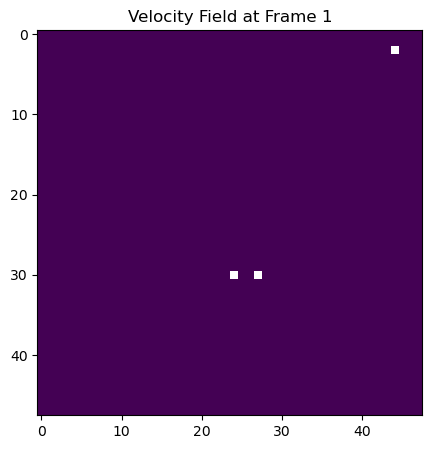

In [25]:
frame_index = 1
selected_frame = velocity_field[frame_index]

# Extract the x and y components of the velocity vectors
x_component = selected_frame[:, :, 0]
y_component = selected_frame[:, :, 1]

# Create a grid of coordinates for the quiver plot
image = np.sqrt(np.square(x_component)+np.square(y_component))

# Plot the vector field using quiver plot
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title('Velocity Field at Frame {}'.format(frame_index))
plt.show()

In [26]:
for i in range(len(image)):
    for j in range(len(image[0])):
        if image[i,j] !=0:
            print(image[i,j])

nan
nan
nan


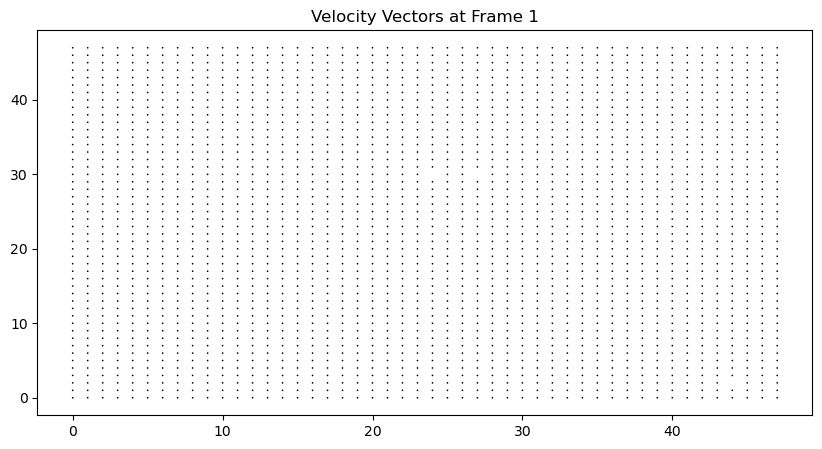

In [27]:
frame_index =1
selected_frame = velocity_field[frame_index]

# Extract the x and y components of the velocity vectors
x_component = selected_frame[:, :, 0]
y_component = selected_frame[:, :, 1]

# Create a grid of coordinates for the quiver plot
x, y = np.meshgrid(np.arange(selected_frame.shape[1]), np.arange(selected_frame.shape[0]))

# Plot the velocity vectors using quiver plot
plt.figure(figsize=(10, 5))
plt.quiver(x, y, x_component, y_component, angles='xy', scale_units='xy', scale=1)
plt.title('Velocity Vectors at Frame {}'.format(frame_index))
plt.show()

(48, 48, 3)
(48, 48)


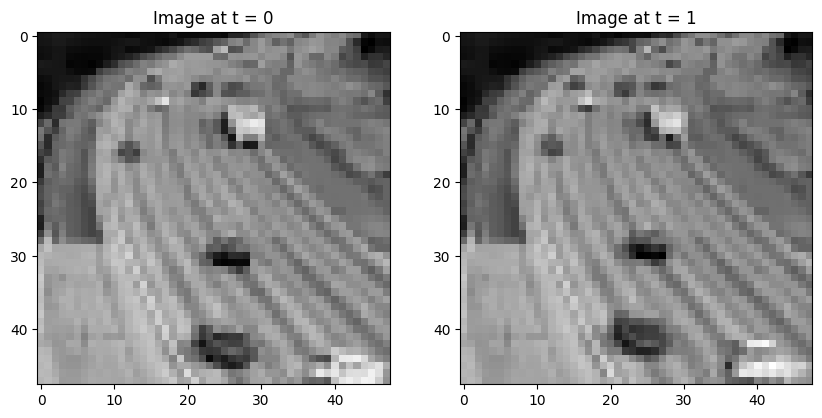

48
48


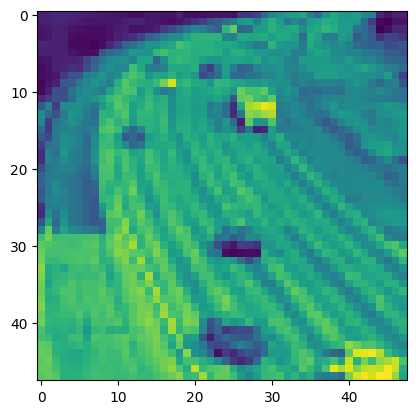

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2

# Read the images
image1 = cv2.imread('image1.png')
image2 = cv2.imread('image2.png')
print(image1.shape)
# Display the images
plt.figure(figsize=(10, 5))
image1 = cv2. cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
print(image1.shape)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image at t = 0')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image at t = 1')

plt.show()

plt.imshow(cv2.cvtColor(image2-image1, cv2.COLOR_BGR2RGB))
print(len(image1))
print(len(image1[0]))
video_image = np.zeros((len(image1), len(image1),2))
video_image[:,:,0] = image1
video_image[:,:,1] = image2

plt.imshow(video_image[:,:,0])